# **Project - Real or Fake Job Posting Analysis**

## 1. Introduction


---



As we reach the end of our academic journey, most students have started looking for full time or internship positions. As we go through this journey, we see a lot of employment scams on the rise. This could be a reason due to unemployment. As per many validated sources, we see the number of employment scams doubling year on year. Many people are falling prey to these employement scams using the desperation that is caused by an unprecedented incident.

We see many job postings online offering lucrative job opportunities for new grads which later end up making students pay money to the recruiter in return or they require investment from the job seeker with the promise of a job.

We aim to disect the job postings present in the dataset to figure out the most common phrases scammers use in their postings as well as which department, industry has seen the most amount of fraudulent job postings. Exploratory data analysis, text classification and naive bayes classifier has been used to derive insightful information as well as predict the type of job posting. 

Our analysis will help the consumer better analyse if the job postings he comes across are fake or real.





## Packages Required


---


This project requires the following packages to be installed to derive insightful outcomes.

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [61]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from collections import defaultdict
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk import ngrams
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re


## 2. Data Preparation


---


https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

The dataset we used was Real / Fake Job Posting Prediction provided by Kaggle.
This dataset contains 18K job descriptions which contain real and fake job descriptions. It consists of both textual information and meta-information about the jobs and can be used to create classification models which can learn and eventually predict the job descriptions which are fraudulent in nature. 
    


## Data Attributes


---

1. job_id → Unique Job ID

2. title → Title of the job

3. location → Geographical location of the job

4. department → Corporate Department

5. salary_range → Range of Expected Salary

6. company_profile → Brief Description of the Company

7. description → Detailed description of the job

8. requirements → Enlisted requirements for the job opening

9. benefits → Enlisted offered benefits by the employer

10. telecommunicating → True for telecommuting positions

11. has_company_logo → True if company logo is present

12. has_questions → True if screening questions are present

13. employment_type → Full-type, Part-time, Contract, etc.

14. required_experience → Executive, Entry level, Intern, etc.

15. required_education → Doctorate, Master’s Degree, Bachelor, etc.

16. industry → Automotive, IT, Health care, Real estate, etc.

17. function → Consulting, Engineering, Research, Sales etc.

18. fraudulent → target — Classification attribute (1 for fraudulent, else 0)




## Data Importing


---

First step is to import the dataset
    

In [63]:
#loading the dataset and print only top 5 rows
data_path = "drive/My Drive/Colab Notebooks/BIA 610/fake_job_postings.csv"
df=pd.read_csv(data_path)
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [64]:
# checking number of observations in the dataset
df.shape

(17880, 18)

In [65]:
# checking data type of the observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

From the above outputs, we can see that the dataset is fairly large with 17880 rows and 18 columns containing a mixture of numeric and categorical data. It has 5 columns with numeric data and rest are categorical. 


In [66]:
# description of numeric values in dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


# Data Cleaning


---

From the information above, we do notice that the dataset has some missing values or duplicate values which are used as a valid observation. It could mean that fake posts often have missing or duplicated fields.

In [67]:
# check for duplicate values in dataframe
df.duplicated().sum()

0

In [68]:
# check for missing values in dataset
df.isna().sum().sort_values(ascending=False)


salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

We see the dataset has no duplicate values, however has a lot of missings values. 

salary_range had the most number of missings values, followed by department and required_education. 

We visualize the dataset by creating a correlation matrix to study the numeric data relationship. 
​

<ipython-input-69-b3b46e716043>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)


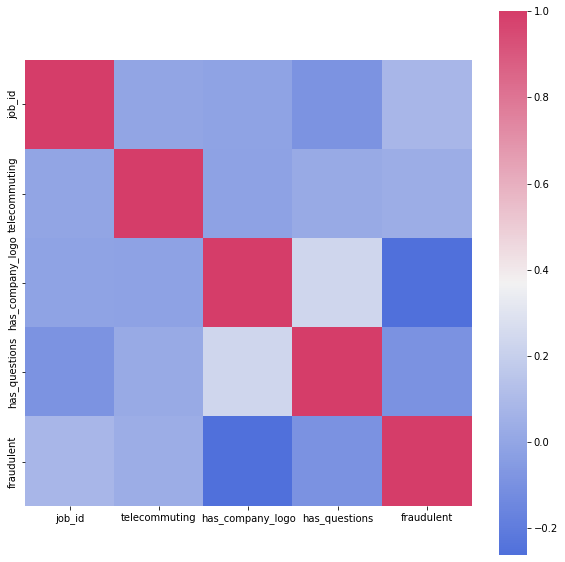

In [69]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

The correlation matrix does not exhibit any strong positive or negative correlations between the numeric data.

From the matrix, we see no correlation. We drop all those columns from our dataset.

In [70]:
df_1 = df.drop(['job_id' , 'salary_range' , 'telecommuting' , 'has_company_logo' , 'has_questions'] , axis = 1)

In [71]:
df_1['Country'] = df_1['location'].str[:2]
df_1.head(5)

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,Country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


 Shape of data after dropping columns

In [72]:
df_1.shape

(17880, 14)

Replacing Null values with NA​

In [73]:
df_1.fillna(" ", inplace=True)
df_1.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
Country                0
dtype: int64

In [74]:
## 2.4 Summary of Dataset
df_1.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,Country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [75]:
df_1.describe()

,fraudulent
count,17880.000000
mean,0.048434
std,0.214688
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# 3. Exploratory Data Analysis


---

We formulate 3 major research questions-


*   Which industry has most number of fake job postings
*   Which department has most number of fake job postings
*   Which phrases are the most commonly occuring in fake job postings

Apart from these major questions, we also expore and understand other important insights in fraud postings such as type of jobs, employement type etc.




**Checking the entire dataset to see how many fake and real jobs are present**

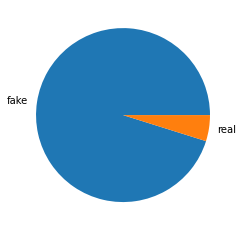

In [76]:
fake=df_1[df_1["fraudulent"]==0]["fraudulent"].count()
real=df_1[df_1["fraudulent"]==1]["fraudulent"].count()
plt.pie([fake,real],labels=["fake","real"]);

We see that this dataset has more fake jobs than real jobs. It also shows the dataset is highly imbalanced. 

## 1. Which industry have the maximum number of fake job postings?




In [77]:
df_industry = df_1[df_1['fraudulent']== 1]
df_vc = df_industry.groupby(["industry"]).sum()
df_vc.head(10)

,fraudulent
industry,
,275
Accounting,57
Airlines/Aviation,1
Animation,2
Apparel & Fashion,2
Automotive,5
Banking,3
Biotechnology,4
Broadcast Media,1


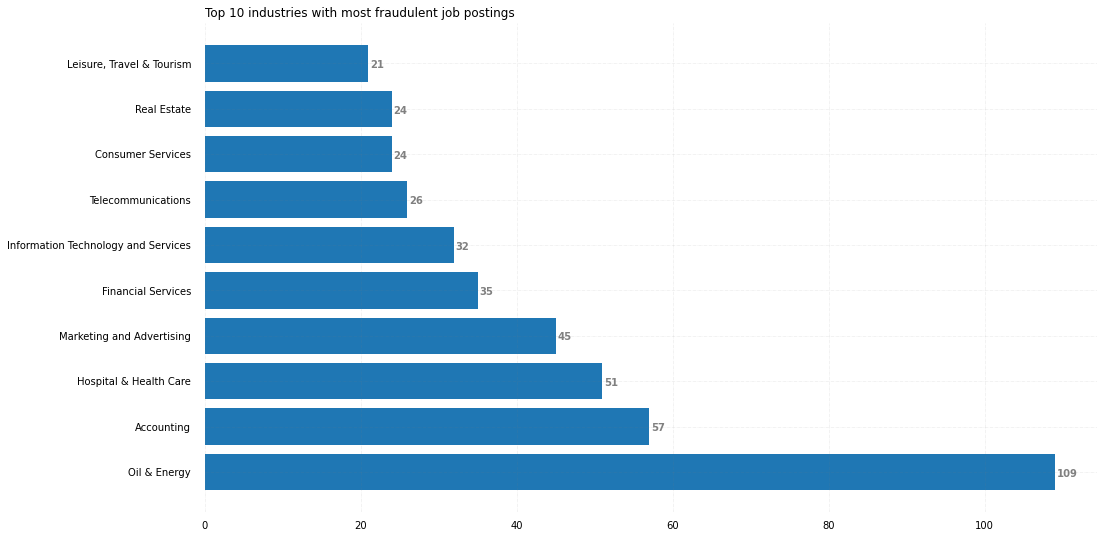

In [78]:
df_vc = df_vc.sort_values(by=['fraudulent'])
dfv = df_vc.tail(11)

x = dfv.index[:-1]
y = dfv["fraudulent"][:-1]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 10 industries with most fraudulent job postings',loc ='left',)

plt.show()

We see **Oil and Energy** is the industry with most number of fraud postings.

## 2. Top 10 departments having most fraud job postings​

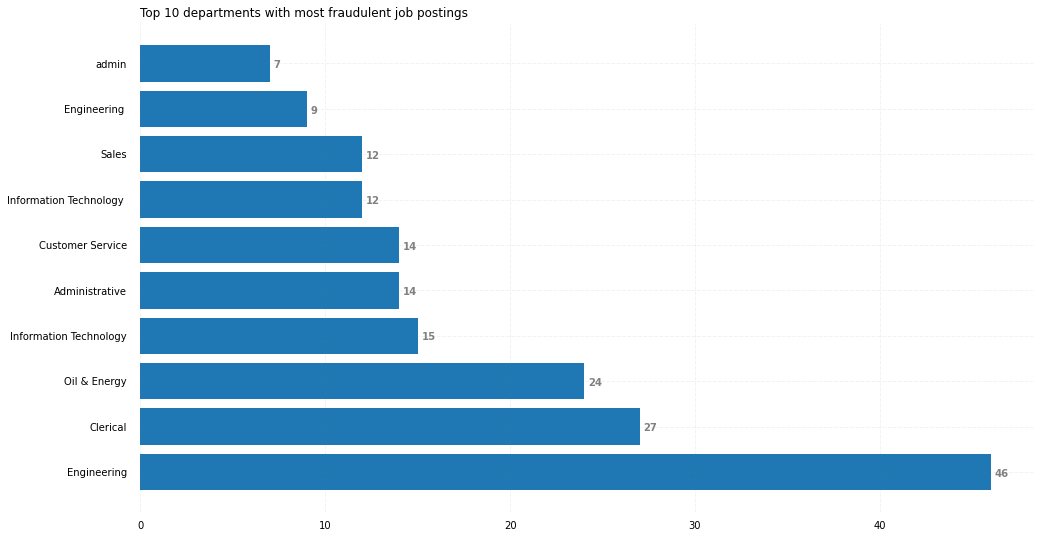

In [79]:
df_vc2 = df_1[df_1['fraudulent']== 1]
df_vc2 = df_vc2.groupby(["department"]).sum()
df_vc2 = df_vc2.sort_values(by=['fraudulent'])
dfv = df_vc2.tail(11)

x = dfv.index[:-1]
y = dfv["fraudulent"][:-1]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 10 departments with most fraudulent job postings',loc ='left',)

plt.show()

**Engineering** department has most number of fraud postings

**Finding which countries have most fraudulent job posts**

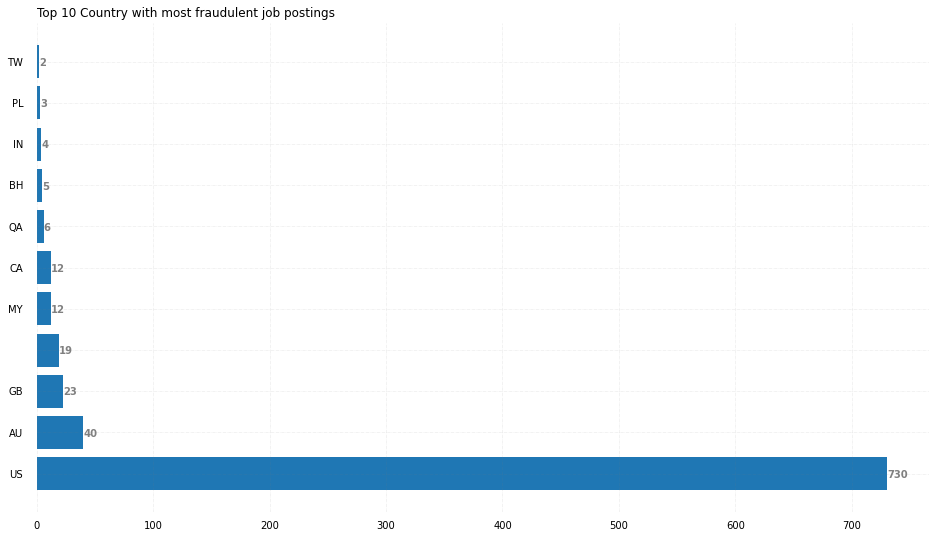

In [93]:
df_vc2 = df_1[df_1['fraudulent']== 1]
df_vc2 = df_vc2.groupby(["Country"]).sum()
df_vc2 = df_vc2.sort_values(by=['fraudulent'])
dfv = df_vc2.tail(11)

x = dfv.index
y = dfv["fraudulent"]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 10 Country with most fraudulent job postings',loc ='left',)

plt.show()

We see **USA** is the country with most fraud postings. Going into detail to check which location has the most scam posts.

**Top Locations with fraud job postings**

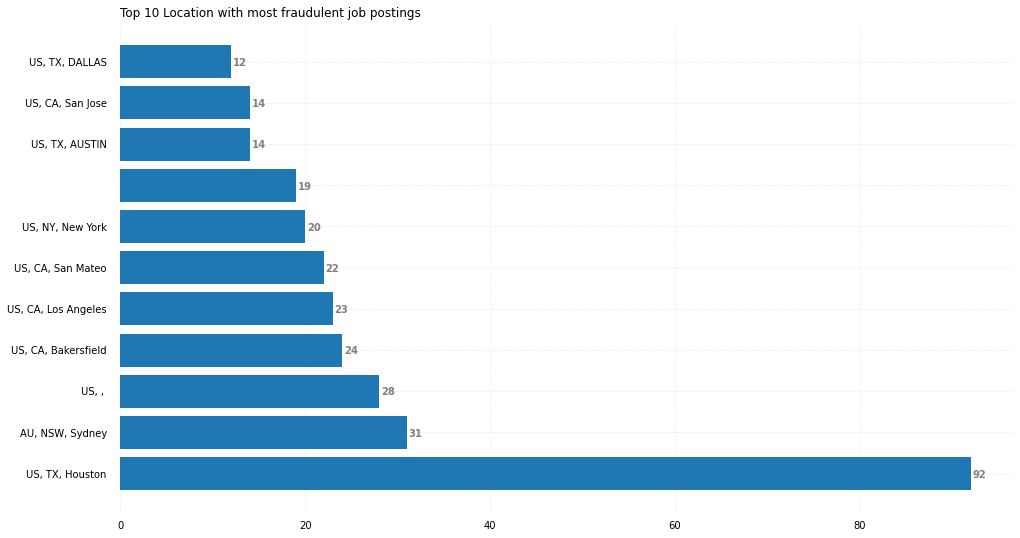

In [94]:
df_vc2 = df_1[df_1['fraudulent']== 1]
df_vc2 = df_vc2.groupby(["location"]).sum()
df_vc2 = df_vc2.sort_values(by=['fraudulent'])
dfv = df_vc2.tail(11)

x = dfv.index
y = dfv["fraudulent"]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 10 Location with most fraudulent job postings',loc ='left',)

plt.show()

City of **Houston** in **Texas** has clearly shown to have most scam posts with 92 of its posts being fraudulent as compared to the other USA cities. 

**Finding the employement type in fake posts**

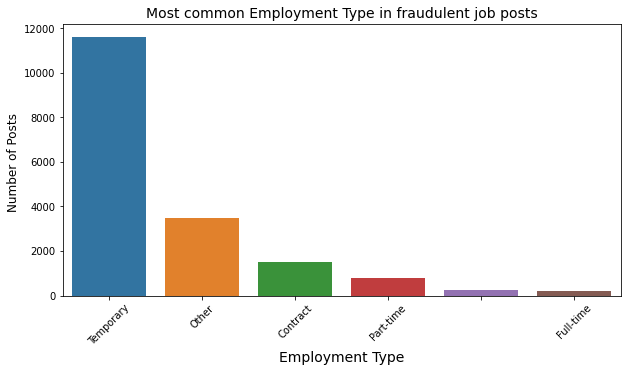

In [101]:
employment_type = df_1.employment_type.value_counts()
df_evc = df_1[df_1['fraudulent']== 1]
df_evc = df_evc.groupby(["employment_type"]).sum()
df_evc = df_evc.sort_values(by=['fraudulent'])
dfv = df_evc.tail(11)

x = dfv.index
y = dfv["fraudulent"]
plt.figure(figsize = (10,5))
sns.barplot(x = dfv.index, y = employment_type)
plt.title("Most common Employment Type in fraudulent job posts", fontdict = {"fontsize" : 14})
plt.xlabel("Employment Type", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);

**Temporary** positions have the most fake job postings

**Finding The required experience type most mentioned in fraud posts**

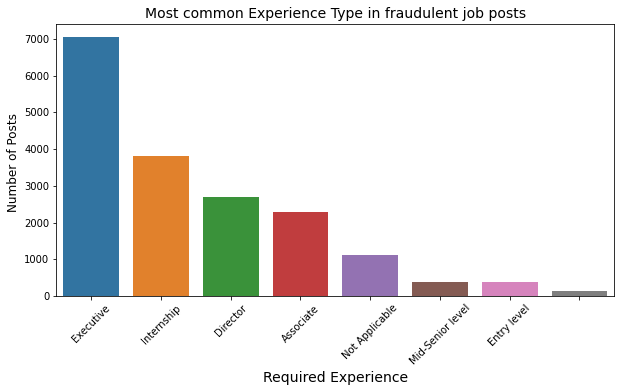

In [103]:
required_experience = df_1.required_experience.value_counts()
df_re = df_1[df_1['fraudulent']== 1]
df_re = df_re.groupby(["required_experience"]).sum()
df_re = df_re.sort_values(by=['fraudulent'])
dfre = df_re.tail(11)

x = dfre.index
y = dfre["fraudulent"]
plt.figure(figsize = (10,5))
sns.barplot(x = dfre.index, y = required_experience)
plt.title("Most common Experience Type in fraudulent job posts", fontdict = {"fontsize" : 14})
plt.xlabel("Required Experience", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);

**Executive** occurs the most in scam posts

## 3. Top Phrases present in fraudulent job postings


This dataset will be preprocessed for training. For this purpose, all the important text data is combined in one column and rest are deleted except the target column.

In [80]:
del df['salary_range']
del df['job_id']
df.fillna(" ",inplace = True)

In [81]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']
df.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [82]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

This is how the dataset lookslike after merging the words together 

In [83]:
df.head(5)

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


Text preprocessing is a method to clean the text to make it ready to feed to models. Noise in the text comes in varied forms like emojis, punctuations, different cases. All these noises are of no use to machines and hence need to clean it.​

​Stemming is a technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization.

​It reduces words to their basic form or stem, which may or may not be a legitimate word in the language.


In [84]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
def clean(text):
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [86]:
df["text"]=df["text"].apply(clean)

To visualize the fraud and real job postings, the Word Cloud is used to see the top occurring keywords in the data.

In [87]:
def generate(text,ngram):
    n_grams=ngrams(word_tokenize(text),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

(-0.5, 799.5, 799.5, -0.5)

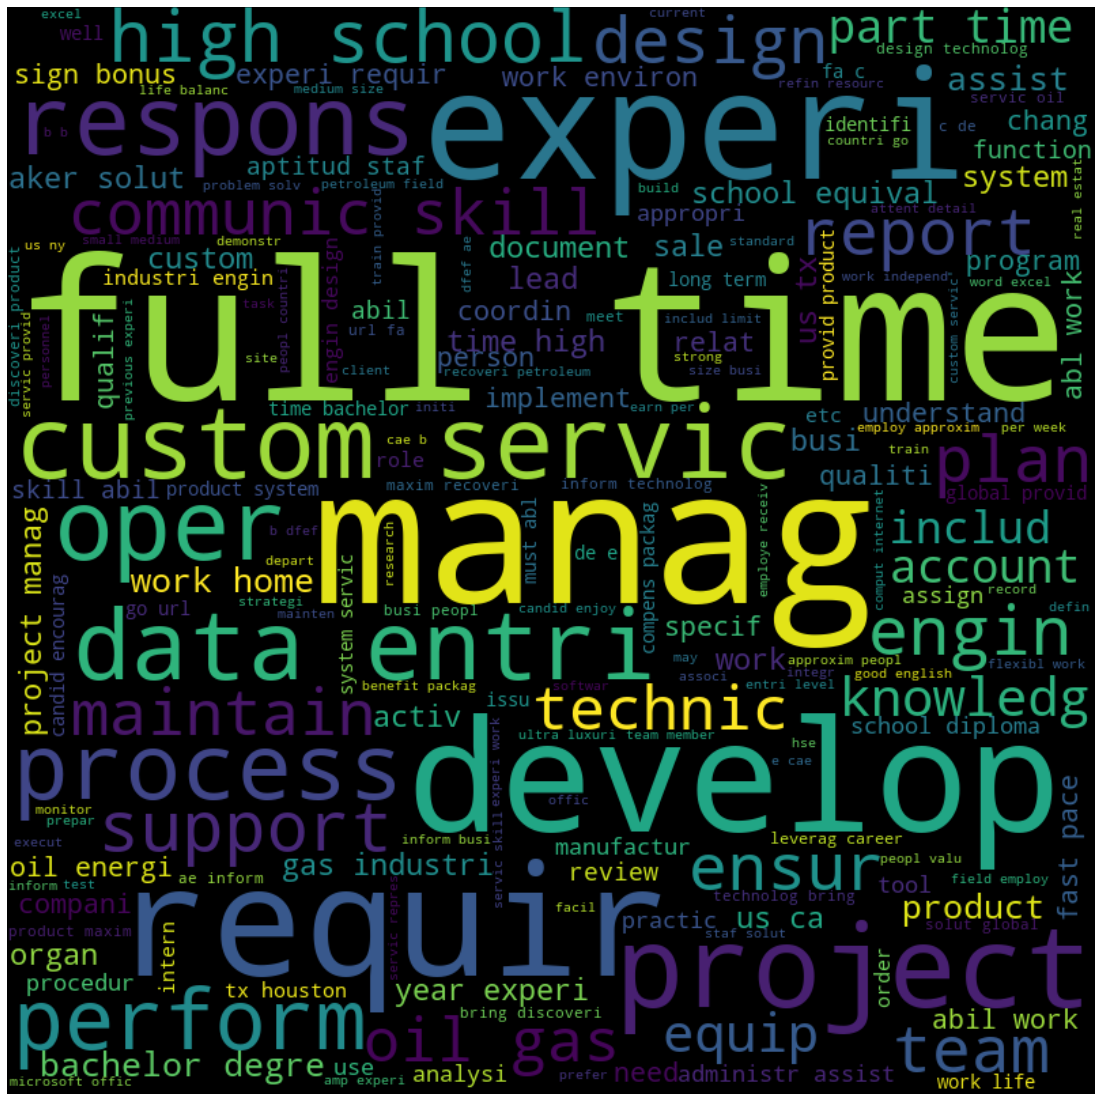

In [88]:
real_job=df[df["fraudulent"]==1]["text"].values
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(real_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<BarContainer object of 10 artists>

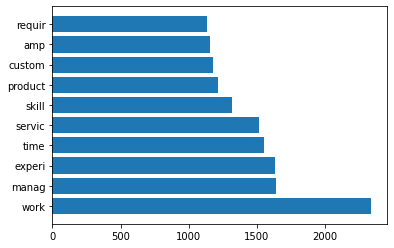

In [107]:
import nltk
nltk.download('punkt')
pos_1=defaultdict(int)

for text in df[df["fraudulent"]==1]["text"]:
    for words in generate(text,1):
        pos_1[words]+=1
        
pos=pd.DataFrame(sorted(pos_1.items(),key=lambda x: x[1],reverse=True))
plt.barh(pos[0][:10],pos[1][:10])

TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.​

TfidfVectorizer weights the word counts by a measure of how often they appear in the documents​

​

In [89]:
vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word',
                           ngram_range=(1, 2),
                           max_features=15000,
                           smooth_idf=True,
                           sublinear_tf=True)

vectorizer.fit(df["text"])
X = vectorizer.transform(df["text"])

Once we are ready with the training and test data, we will train the machine learning model (80/20 split ) to classify the fraudulent and real job postings.

In [90]:
y=df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.20, random_state=42)

# 4. Prediction

---

**Naïve Bayes** is used because it can compute two events' conditional probabilities based on the probabilities of occurrence of each event.​

Encoding those probabilities is extremely useful​

In [91]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [92]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")

Accuracy score: 0.9765100671140939


**Classification Matrix**

In [104]:
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.89      0.61      0.72       181

    accuracy                           0.98      3576
   macro avg       0.94      0.80      0.86      3576
weighted avg       0.98      0.98      0.97      3576



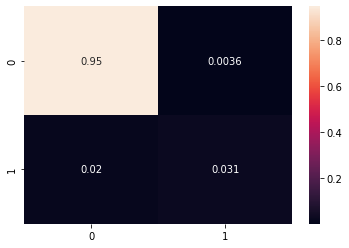

In [105]:
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)

# 5. Summary


---

We were able to clean and process data successfully.
With the use of exploratory data analysis, we were able to determine -​

Which industry has the most fraudulent job postings, ​

The top 10 departments for such postings, and the terms that are most frequently used in such postings.​

Anticipate the phrases that appeared most frequently in fraudulent job postings. ​

We were able to preprocess and clean textual data using NLP techniques.​

Using Navie Bayes' model, we were able to achieve an accuracy of 97% while trying to predict most frequent phrases.​


From our above anaysis, we can suggest students to be wary of job postings in oil and energy industry which ask for temporary locations in houston/texas in united states. Engineering department in those industries in same location are also in scam lists. Keywords such as product, require, customer etc are to be noted by the student.

In the end, which job a person applies to will be at the discretion of the individual student, however we hope this project will highlight those job postings that seem fraudulent to help a student in their job application journey. 

# 6. Future Scope


---


*  As we were working through the analysis, we noticed that the dataset was highly imbalanced. In future, we can make use of techniques such as SMOTE to balance the dataset that can generate better model results.
* Comparison with other classification models aprt from Naive Bayes can help compare accuracy of our model with others to give better predictions of fraudulent posts.



